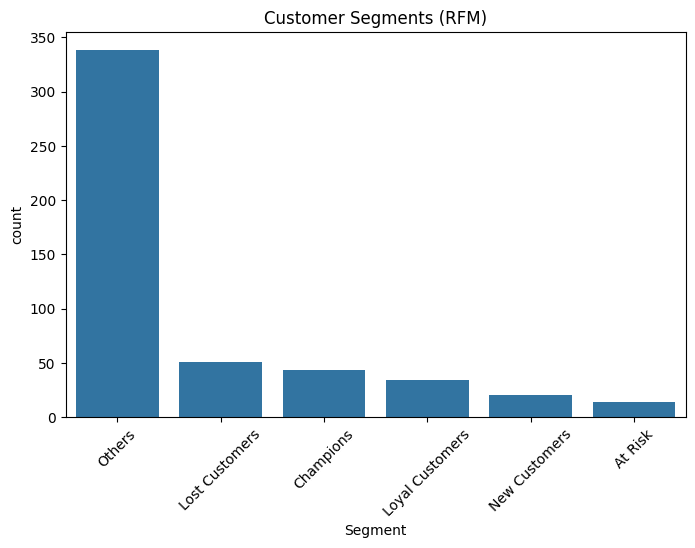

/tmp/ipython-input-891041884.py:79: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_pivot = rfm.pivot_table(


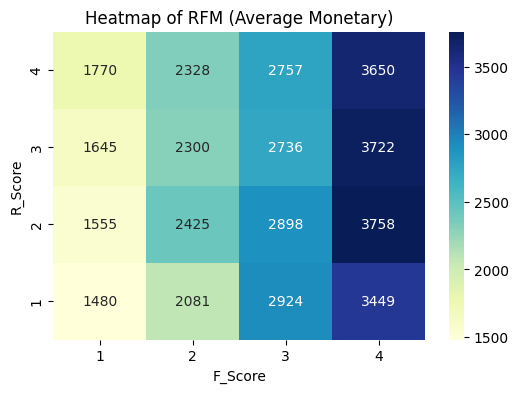

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
CustomerID,,,,,,,,
1000,109,13,3576,1,4,4,144,At Risk
1001,76,7,2107,1,1,2,112,Lost Customers
1002,8,10,1773,4,2,1,421,Others
1003,38,11,3203,2,3,3,233,Others
1004,9,13,3521,4,4,4,444,Champions


In [3]:
# -------------------------------
# Customer Segmentation Using RFM
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# 1. Generate Fake Online Retail Dataset
np.random.seed(42)
n_customers = 500
n_transactions = 5000

data = pd.DataFrame({
    "InvoiceNo": np.random.randint(10000, 20000, n_transactions),
    "StockCode": np.random.randint(100, 999, n_transactions),
    "Description": np.random.choice(["Shoes", "Shirt", "Bag", "Watch", "Laptop"], n_transactions),
    "Quantity": np.random.randint(1, 5, n_transactions),
    "InvoiceDate": pd.to_datetime(
        np.random.choice(pd.date_range("2023-01-01", "2023-12-31"), n_transactions)
    ),
    "UnitPrice": np.random.randint(10, 200, n_transactions),
    "CustomerID": np.random.randint(1000, 1500, n_transactions),
    "Country": np.random.choice(["UK", "USA", "Germany", "France"], n_transactions)
})

# TotalPrice column
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

# 2. RFM Calculation
latest_date = data["InvoiceDate"].max() + dt.timedelta(days=1)

rfm = data.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                                # Frequency
    "TotalPrice": "sum"                                    # Monetary
})

rfm.rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "TotalPrice": "Monetary"
}, inplace=True)

# 3. RFM Scoring
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])

rfm["RFM_Score"] = (
    rfm["R_Score"].astype(str) +
    rfm["F_Score"].astype(str) +
    rfm["M_Score"].astype(str)
)

# 4. Simple Segmentation Logic
def segment(x):
    if x.startswith("44"): return "Champions"
    elif x.startswith("34"): return "Loyal Customers"
    elif x.startswith("14"): return "At Risk"
    elif x.startswith("11"): return "Lost Customers"
    elif x.startswith("41"): return "New Customers"
    else: return "Others"

rfm["Segment"] = rfm["RFM_Score"].apply(segment)

# 5. Visualization

# Segment counts
plt.figure(figsize=(8,5))
sns.countplot(x="Segment", data=rfm, order=rfm["Segment"].value_counts().index)
plt.title("Customer Segments (RFM)")
plt.xticks(rotation=45)
plt.show()

# Heatmap of Recency vs Frequency with avg Monetary
rfm_pivot = rfm.pivot_table(
    index="R_Score", columns="F_Score", values="Monetary", aggfunc="mean"
)

plt.figure(figsize=(6,4))
sns.heatmap(rfm_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of RFM (Average Monetary)")
plt.show()

# Show first few results
rfm.head()


In [5]:
# -----------------------------------
# RFM Analysis Mini-Interface in Colab
# -----------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
from IPython.display import display

# Generate Fake Dataset
np.random.seed(42)
n_customers = 300
n_transactions = 2000

data = pd.DataFrame({
    "InvoiceNo": np.random.randint(10000, 20000, n_transactions),
    "StockCode": np.random.randint(100, 999, n_transactions),
    "Description": np.random.choice(["Shoes", "Shirt", "Bag", "Watch", "Laptop"], n_transactions),
    "Quantity": np.random.randint(1, 5, n_transactions),
    "InvoiceDate": pd.to_datetime(
        np.random.choice(pd.date_range("2023-01-01", "2023-12-31"), n_transactions)
    ),
    "UnitPrice": np.random.randint(10, 200, n_transactions),
    "CustomerID": np.random.randint(1000, 1500, n_transactions),
    "Country": np.random.choice(["UK", "USA", "Germany", "France"], n_transactions)
})
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

# Latest date for Recency
latest_date = data["InvoiceDate"].max() + dt.timedelta(days=1)

# RFM Table
rfm = data.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
}).reset_index()

rfm.rename(columns={"InvoiceDate": "Recency", "InvoiceNo": "Frequency", "TotalPrice": "Monetary"}, inplace=True)

# RFM Scoring
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

# Simple segmentation
def segment(x):
    if x.startswith("44"): return "Champions"
    elif x.startswith("34"): return "Loyal Customers"
    elif x.startswith("14"): return "At Risk"
    elif x.startswith("11"): return "Lost Customers"
    elif x.startswith("41"): return "New Customers"
    else: return "Others"

rfm["Segment"] = rfm["RFM_Score"].apply(segment)

# --- Interface Widgets ---
segment_dropdown = widgets.Dropdown(
    options=["All"] + sorted(rfm["Segment"].unique().tolist()),
    description="Segment:",
    style={'description_width': 'initial'}
)

def update(segment_choice):
    display_df = rfm if segment_choice=="All" else rfm[rfm["Segment"]==segment_choice]

    print(f"Showing {len(display_df)} customers in '{segment_choice}' segment")
    display(display_df.head(10))  # show top 10

    # Plot segment distribution
    plt.figure(figsize=(7,4))
    sns.countplot(x="Segment", data=rfm, order=rfm["Segment"].value_counts().index)
    plt.title("Customer Segment Distribution")
    plt.xticks(rotation=45)
    plt.show()

    # Heatmap
    rfm_pivot = rfm.pivot_table(index="R_Score", columns="F_Score", values="Monetary", aggfunc="mean")
    plt.figure(figsize=(6,4))
    sns.heatmap(rfm_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Heatmap: Monetary Value by R & F Score")
    plt.show()

widgets.interact(update, segment_choice=segment_dropdown)


interactive(children=(Dropdown(description='Segment:', options=('All', 'At Risk', 'Champions', 'Lost Customers…

<function __main__.update(segment_choice)>

In [6]:
# =================================================
#  Fancy RFM Dashboard with Colorful Buttons (Colab)
# =================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
from IPython.display import display, clear_output

# -------- Generate Fake Dataset --------
np.random.seed(42)
n_customers = 300
n_transactions = 2000

data = pd.DataFrame({
    "InvoiceNo": np.random.randint(10000, 20000, n_transactions),
    "StockCode": np.random.randint(100, 999, n_transactions),
    "Description": np.random.choice(["Shoes", "Shirt", "Bag", "Watch", "Laptop"], n_transactions),
    "Quantity": np.random.randint(1, 5, n_transactions),
    "InvoiceDate": pd.to_datetime(
        np.random.choice(pd.date_range("2023-01-01", "2023-12-31"), n_transactions)
    ),
    "UnitPrice": np.random.randint(10, 200, n_transactions),
    "CustomerID": np.random.randint(1000, 1500, n_transactions),
    "Country": np.random.choice(["UK", "USA", "Germany", "France"], n_transactions)
})
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

# -------- RFM Table --------
latest_date = data["InvoiceDate"].max() + dt.timedelta(days=1)

rfm = data.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
}).reset_index()

rfm.rename(columns={"InvoiceDate": "Recency", "InvoiceNo": "Frequency", "TotalPrice": "Monetary"}, inplace=True)

# RFM Scoring
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

# Segmentation
def segment(x):
    if x.startswith("44"): return "Champions"
    elif x.startswith("34"): return "Loyal Customers"
    elif x.startswith("14"): return "At Risk"
    elif x.startswith("11"): return "Lost Customers"
    elif x.startswith("41"): return "New Customers"
    else: return "Others"

rfm["Segment"] = rfm["RFM_Score"].apply(segment)

# -------- Button-based Interface --------
out = widgets.Output()

btn_all = widgets.Button(description="📋 Show All Segments", button_style='info')
btn_bar = widgets.Button(description="📊 Segment Distribution", button_style='success')
btn_heat = widgets.Button(description="🔥 Heatmap", button_style='warning')
btn_top = widgets.Button(description="⭐ Top 10 Champions", button_style='danger')

# Styling
for b in [btn_all, btn_bar, btn_heat, btn_top]:
    b.layout.width = "200px"
    b.layout.height = "40px"

def show_all(b):
    with out:
        clear_output()
        display(rfm.head(15))

def show_bar(b):
    with out:
        clear_output()
        plt.figure(figsize=(7,4))
        sns.countplot(x="Segment", data=rfm, order=rfm["Segment"].value_counts().index, palette="Set2")
        plt.title("Customer Segment Distribution")
        plt.xticks(rotation=45)
        plt.show()

def show_heat(b):
    with out:
        clear_output()
        rfm_pivot = rfm.pivot_table(index="R_Score", columns="F_Score", values="Monetary", aggfunc="mean")
        plt.figure(figsize=(6,4))
        sns.heatmap(rfm_pivot, annot=True, fmt=".0f", cmap="coolwarm")
        plt.title("Heatmap: Monetary by R & F")
        plt.show()

def show_top(b):
    with out:
        clear_output()
        champions = rfm[rfm["Segment"]=="Champions"].sort_values("Monetary", ascending=False).head(10)
        display(champions)

# Bind buttons
btn_all.on_click(show_all)
btn_bar.on_click(show_bar)
btn_heat.on_click(show_heat)
btn_top.on_click(show_top)

# Display Interface
dashboard = widgets.HBox([btn_all, btn_bar, btn_heat, btn_top])
display(dashboard, out)


Output()